In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [3]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


C:\Users\hp\AppData\Local\Temp\ipykernel_3424\3147607464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")


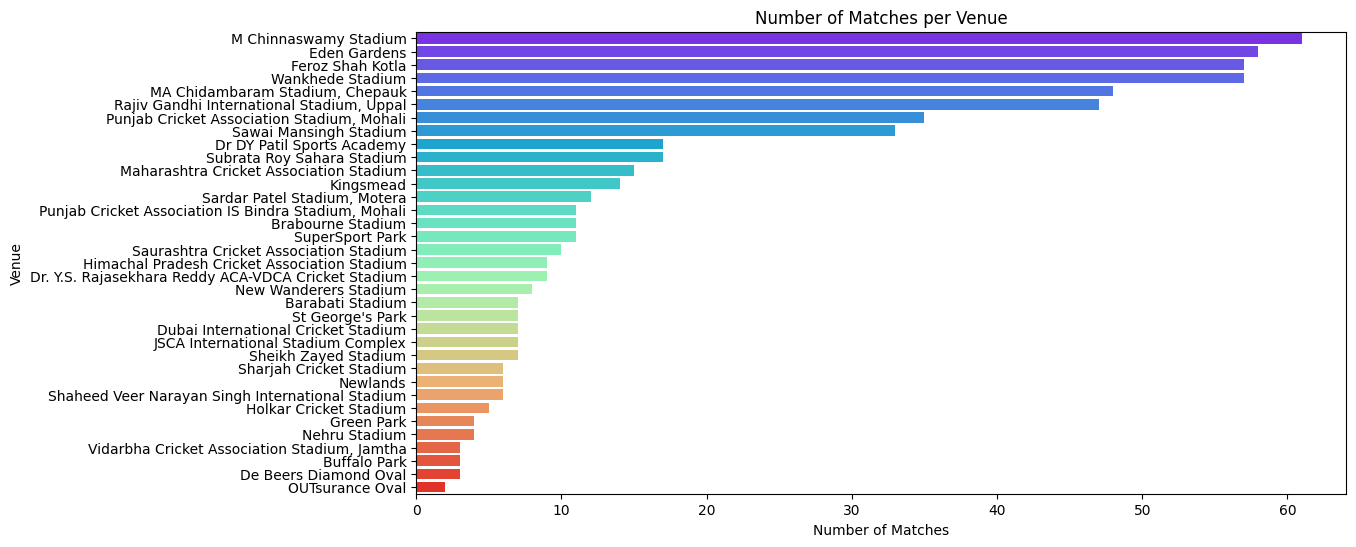

In [4]:
# Total matches per venue
data = ipl.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3424\1761167641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")


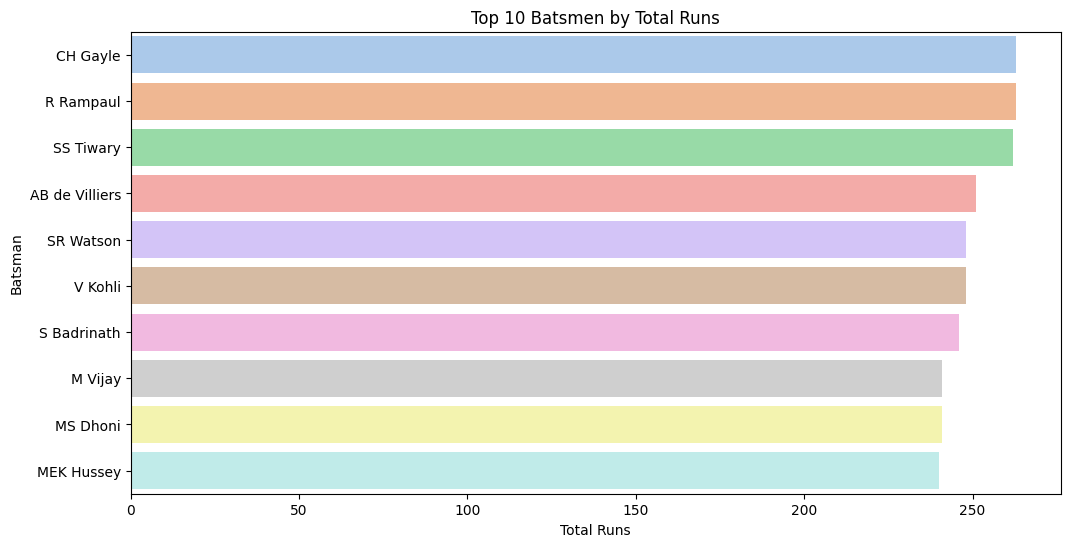

In [5]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3424\2858948816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


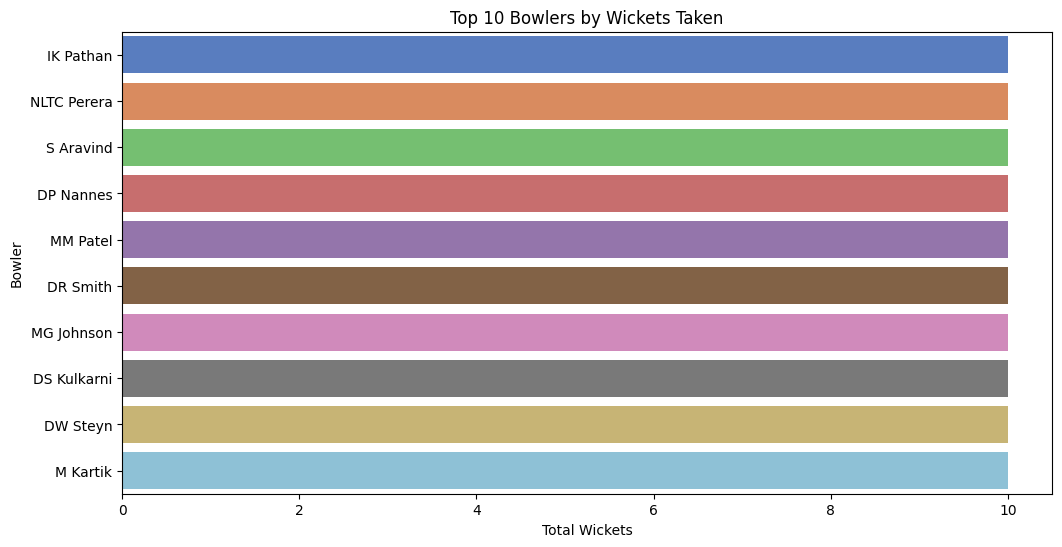

In [7]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['bat_team', 'bowl_team', 'venue',"batsman","bowler"]

# Create a copy of data to avoid changing original
data_encoded = data.copy()

# Initialize label encoders for each categorical column
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # Save encoder for future use (like inverse transform)

# Define feature columns
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs','striker','batsman','bowler']

X = data_encoded[feature_cols]
y = data_encoded['total']  # Target variable


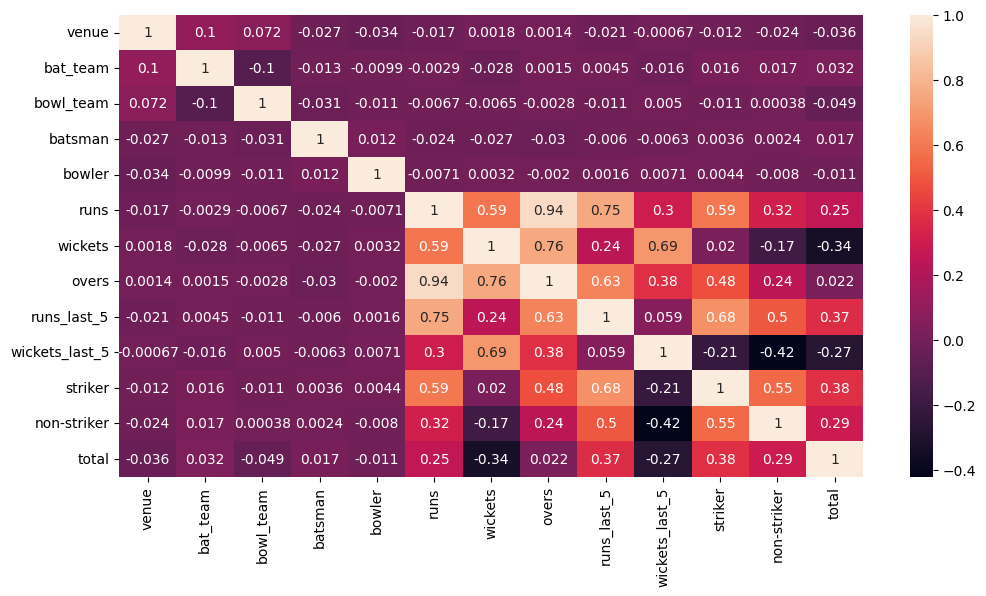

In [9]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=1)
plt.figure(figsize=(12,6))
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [10]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [13]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 51.4691 - val_loss: 15.1833
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 15.1546 - val_loss: 14.3237
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 14.7293 - val_loss: 14.2558
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 14.6139 - val_loss: 14.4579
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 14.7139 - val_loss: 14.1688
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 14.5464 - val_loss: 14.2609
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 14.6109 - val_loss: 14.1598
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 14.6089 - val_loss: 14.4392
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 14.6037 - val_loss: 14.3274
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 14.5930 - val_loss: 14.1766


<Axes: >

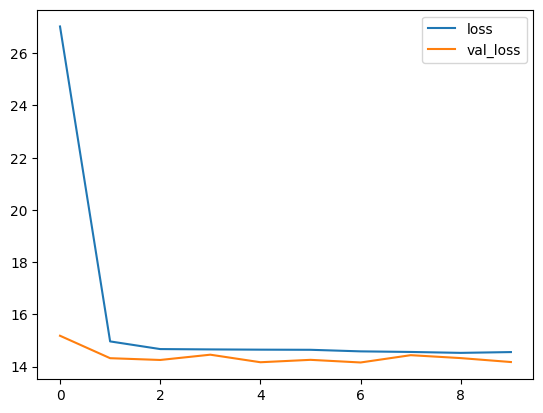

In [14]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [15]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


14.667498588562012

In [16]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

# Dropdowns for categorical features with label encoders applied
venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
bowling_team.style = {'description_width': 'initial'}

striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')
bowler.style = {'description_width': 'initial'}

# Numeric inputs for other features
runs = widgets.IntText(value=0, description='Runs:', style={'description_width': 'initial'})
wickets = widgets.IntText(value=0, description='Wickets:', style={'description_width': 'initial'})
overs = widgets.FloatText(value=0.0, description='Overs:', style={'description_width': 'initial'})
striker_ind = widgets.IntText(value=0, description='Striker:', style={'description_width': 'initial'})  # Assuming 0 or 1
predict_button = widgets.Button(description="Predict Score")

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()  # Clear previous output

        # Encode categorical inputs
        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]

        # Gather numeric inputs
        input_features = [
            encoded_batting_team,
            encoded_bowling_team,
            encoded_venue,
            runs.value,
            wickets.value,
            overs.value,
            striker_ind.value,
            encoded_striker,
            encoded_bowler
        ]

        # Convert to numpy array and reshape for model
        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)

        # Predict using your trained model
        predicted_score = model.predict(input_array)

        # Assuming prediction is a single value regression output
        print(f"Predicted Total Runs: {int(predicted_score[0])}")

predict_button.on_click(predict_score)

# Display all widgets
display(venue, batting_team, bowling_team, striker, bowler,
        runs, wickets, overs,
        striker_ind,
        predict_button, output)


ModuleNotFoundError: No module named 'ipywidgets'